There is a fantastic word cloud generation library named: Word Cloud (https://github.com/amueller/word_cloud). I found it today and thought to try it. We are going to generate some wordclouds according to different countires: 
1. Area
2. Population
3. Gini Index
4. Number of bordering countries

Let us fetch and prepare the data:

In [7]:
from urllib2 import urlopen
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
%matplotlib inline

countries_json = urlopen('https://restcountries.eu/rest/v2/all')
countries_dic = json.load(countries_json)
cioc_to_country = {x["cioc"]: x["name"] for x in countries_dic}

country_area = {}
country_population = {}
country_gini = {}  # measure of income inequality
country_borders = defaultdict(int)

for item in countries_dic:
	country_area[item["name"]] = item["area"]
	country_population[item["name"]] = item["population"]
	country_gini[item["name"]] = item["gini"] if item["gini"] else 0
	for cnt in item["borders"]:
		country_borders[item["name"]] += 1

The following code generates a word cloud where each countries size represents their relative area:

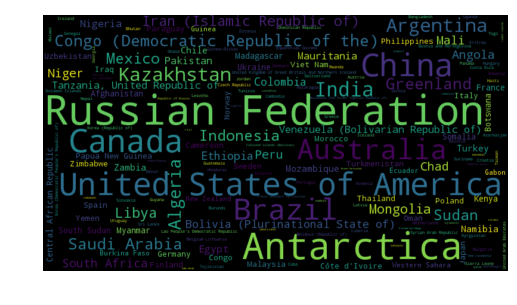

In [12]:
wc = WordCloud().generate_from_frequencies(country_area)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

This is for countries with more income inequalities. 

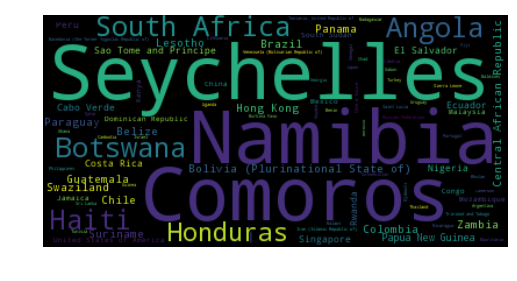

In [5]:
wc = WordCloud().generate_from_frequencies(country_gini)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

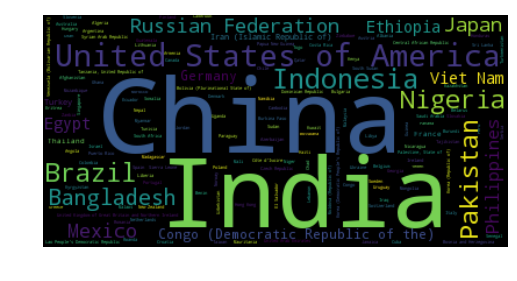

In [4]:
wc = WordCloud().generate_from_frequencies(country_population)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

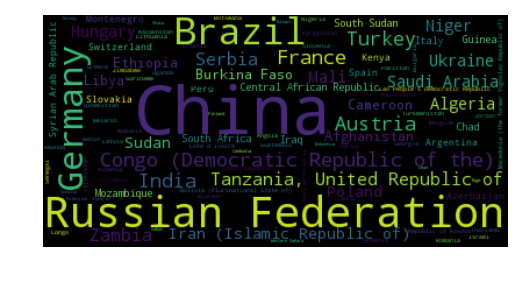

In [6]:
wc = WordCloud().generate_from_frequencies(country_borders)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()